# Text Analysis on all the post taking into account all the languages.

In [2]:
import pandas as pd
import numpy as np
import re
from googletrans import Translator
from langdetect import detect
from sklearn.learning_curve import learning_curve
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import datetime
import time
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from datetime import timedelta
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from sklearn.model_selection import train_test_split,KFold
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet,LogisticRegression #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,Normalizer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import scipy.stats as stats
from sklearn import metrics
import sklearn as sk
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix



from sklearn.metrics import roc_curve, auc,classification_report

%matplotlib inline

/Users/maragatham/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/maragatham/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
/Users/maragatham/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be r

In [72]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from xgboost import plot_tree
from matplotlib.pylab import rcParams
from sklearn import tree
import xgboost
import graphviz
from numpy import loadtxt

## Import the csv from TextAnalysis ipynb. The file contains all the translated messages.

In [4]:
data=pd.read_csv('Master.csv')

In [5]:
data.head()

,Unnamed: 0,company_name,brand_name,type,rank_order,total_comments,total_likes,total_reactions,viewer_reaction,shares_count,weekday,Hour,Viral,name_language,trans_name,clean_name
0,0,Coca Cola,Ilohas,video,chronological,2.0,1.0,1.0,NONE,0.0,1,6,0,English,The Story of Cosmetics (2010),"['the', 'story', 'of', 'cosmetics', '2010']"
1,1,Coca Cola,Ilohas,video,ranked,0.0,14.0,14.0,NONE,0.0,1,14,0,Japanese,Taiwan Demonstration Song Thai Wonder ☆ Theme ...,"['taiwan', 'demonstration', 'song', 'thai', 'w..."
2,2,Coca Cola,Ilohas,link,ranked,0.0,5.0,5.0,NONE,0.0,1,14,0,German,"Neihu Community University, Taipei Social Ente...","['neihu', 'community', 'university', 'taipei',..."
3,3,Coca Cola,Ilohas,video,ranked,1.0,15.0,15.0,NONE,0.0,1,12,0,Korean,Dr. network selling vegetables - Zhang Jun pole,"['dr', 'network', 'selling', 'vegetables', 'zh..."
4,4,Coca Cola,Ilohas,video,ranked,0.0,16.0,16.0,NONE,3.0,1,12,0,Tagalog,Embrace the Generation Start with Education: A...,"['embrace', 'the', 'generation', 'start', 'wit..."


## separating the features and target

In [6]:
features=data.drop(['Unnamed: 0','total_comments','total_likes','total_reactions','shares_count','name_language','weekday','Viral'],axis=1)

In [7]:
target=data.Viral


In [8]:
features.columns


Index(['company_name', 'brand_name', 'type', 'rank_order', 'viewer_reaction',
       'Hour', 'trans_name', 'clean_name'],
      dtype='object')

## Using Count Vectorizer to get the dummies for words and filtering the top 200 features.

In [74]:
transformer = TfidfTransformer(smooth_idf=False)
vectorizer = TfidfVectorizer(stop_words=['a', 'an', 'and', 'are', 'as', 'at', 'be', 
                                         'by', 'for', 'from', 'has', 'he', 'in', 'is', 
                                         'its', 'it', 'of', 'on', 'that', 'the',
                                         'to', 'was', 'were', 'will', 'with', 
                                         'she', 'mm', 'off', '-', '&', '...', '!', '\n', 'du', 'et',
                                         'le', 'las'], min_df = 2, max_features = 200)
tfidf_vec = vectorizer.fit_transform(features.trans_name).toarray()
tfidf_df = pd.DataFrame(tfidf_vec, columns=list(vectorizer.vocabulary_.keys()))
tfidf_df.shape

(16990, 200)

In [76]:
tfidf_df.head()

,story,2010,taiwan,university,social,enterprise,online,2013,make,women,...,mello,yello,connect,sprite,dollar,ciel,meeting,conferencing,remote,pg
0,0.0,0.0,0.697098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
count_vect = CountVectorizer(decode_error = 'ignore',max_features=200)
X_train_counts = count_vect.fit_transform(features.trans_name)


In [10]:
X_train_counts.shape

(16990, 200)

In [11]:
len(X_train_counts.data)

39578

In [12]:
word_arr=X_train_counts.toarray()

In [77]:
len(tfidf_df.columns)

200

In [14]:
len(words_pd.columns)


200

In [15]:
features_mod=features.drop(['trans_name','clean_name'],axis=1)

In [16]:
features_mod.Hour=features_mod.Hour.astype(str)

In [17]:
features_mod=pd.get_dummies(features_mod)

In [18]:
features_mod

,company_name_Coca Cola,company_name_Microsoft,company_name_Nike,company_name_P&G,company_name_Starbucks,brand_name_All,brand_name_Aquarius,brand_name_Ciel,brand_name_Coca Cola Life,brand_name_Dasani,...,Hour_21,Hour_22,Hour_23,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Merging the features and the word dummies 

In [19]:
feature_pd=pd.concat([features_mod,words_pd],join='inner',axis=1)

In [ ]:
feature_pd.head()

In [78]:
feature_df=pd.concat([features_mod,tfidf_df],join='inner',axis=1)

In [79]:
feature_df.head()

,company_name_Coca Cola,company_name_Microsoft,company_name_Nike,company_name_P&G,company_name_Starbucks,brand_name_All,brand_name_Aquarius,brand_name_Ciel,brand_name_Coca Cola Life,brand_name_Dasani,...,mello,yello,connect,sprite,dollar,ciel,meeting,conferencing,remote,pg
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Generic Function to execute the logistic regression and plot the ROC AUC and learning curve

In [20]:
def get_best_log_param(X_data,y_data,language):
    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_data,y_data, test_size=.3, random_state=2911) 
    log_range_port = [1,10,1000,1000000000]
    log_scores_port = []
    print(language)
    for c in log_range_port:
        #knn = KNeighborsClassifier(n_neighbors=k)
        log_p = LogisticRegression(C=c)
        scores = cross_val_score(log_p, X_train_p, y_train_p, cv=5, scoring='f1')
        log_scores_port.append(scores.mean())
    #print(k_scores)
    print('Best Logistic score for language:',language,np.max(log_scores_port))
    print('Best C value for language:',language,log_range_port[np.argmax(log_scores_port)])
    return (X_train_p,y_train_p,X_test_p,y_test_p)
    #print(log_scores_port)
    #log_score_engdict[language]=np.max(log_scores_port)

In [21]:
def log_reg_roc(X,y,C,title='Logistic Regression'):
    xtrainp, xvalp, ytrainp, yvalp = train_test_split(X, y, test_size=0.3, random_state=4444)
    logp = LogisticRegression(C=10)
    logp.fit(xtrainp,np.ravel(ytrainp))
    y_score=logp.predict_proba(xvalp)[:,1]
    
    fpr, tpr,_ = roc_curve(yvalp, y_score)
    roc_auc = auc(fpr, tpr)
    
    conf=confusion_matrix(yvalp,logp.predict(xvalp))
    print(conf)
    
    print('F1 Score for validation set',metrics.f1_score(yvalp,logp.predict(xvalp)))
    
    plt.figure()
    # Plotting our Baseline..
    plt.figure(figsize=(15,9))
        #plt.scatter(pred, res)
    #plt.subplot(2,2,1)
    #plt.subplot(2, 1, 1)
    plt.plot([0,1],[0,1])
    plt.plot(fpr,tpr)
    plt.title(title)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    return logp

In [22]:
def learning_curve_func(est,X_train_p,y_train_p,X_test_p,y_test_p,title='Learning Curve'):
    train_sizes, train_scores, test_scores=learning_curve(est,X_train_p,y_train_p,cv=4,scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    print(train_scores_mean)
    print(test_scores_mean)
    plt.figure(figsize=(15,9))
    plt.title(title)
    plt.legend(loc="best")
    plt.xlabel("Training/CV Samples")
    plt.ylabel("F1 Score")
    
       
    # box-like grid
    plt.grid()
       
       # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="g")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="r")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="g", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Cross-validation score")
    
    
    y_pred=est.predict(X_test_p)
    y_test_f1=metrics.f1_score(y_test_p,y_pred)
    print('F1 Score for test:',y_test_f1)
    plt.scatter(len(y_test_p),y_test_f1,marker='*',s=100)
    plt.legend(['Training Score','Cross-validation Score','Training Std Deviation','Cross Validation Std Deviation','Test Score'])


In [80]:
xtrain, xtest, ytrain, ytest = train_test_split(feature_df, target, test_size=0.3, random_state=2911)

In [81]:
log_mod = LogisticRegression(C=100000000)
log_mod.fit(xtrain,ytrain)

LogisticRegression(C=100000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

[ 0.64435028  0.52478995  0.46528283  0.46233778  0.44871859]
[ 0.28101562  0.36157784  0.37774584  0.38146882  0.39003444]
F1 Score for test: 0.417808219178


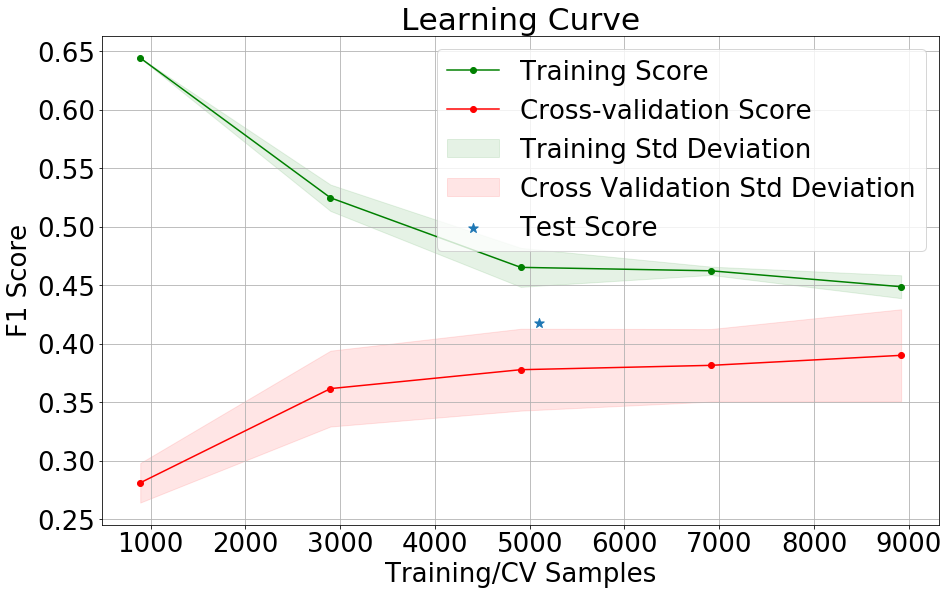

In [82]:
learning_curve_func(log_mod,xtrain,  ytrain,xtest, ytest)

In [83]:
log_tuned_param=[{'C':[.01,.1,1,100,100000000]}]
clf = GridSearchCV(LogisticRegression(),log_tuned_param, cv=4, scoring='f1')
clf.fit(xtrain,ytrain)

GridSearchCV(cv=4, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.01, 0.1, 1, 100, 100000000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [84]:
clf.best_estimator_

LogisticRegression(C=100000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Generic function to execute SVM and plot the ROC AUC curve

In [85]:
def svm_model(X_train_data,y_train_data):
    kernel_list=['linear','rbf']
    #X_data=data_merge[data_merge.name_language==language].drop(['Viral'],axis=1)
    #y_data=data_merge[(data_merge.name_language==language)].Viral
    X_train, X_test, y_train, y_test = train_test_split(X_train_data,y_train_data, test_size=.3, random_state=2911) 
    svm_range_eng = [10,1,.01,.001]#,.01,.001
    svm_scores_eng = []
    
    #print(language)
    for kernel in kernel_list:
        print(kernel)
        for c in svm_range_eng:
                #knn = KNeighborsClassifier(n_neighbors=k)
            svm_mod = svm.SVC(C=c,kernel=kernel)
            scores = cross_val_score(svm_mod, X_train, y_train, cv=5, scoring='f1')
            svm_scores_eng.append(scores.mean())
        #print(k_scores)
    print('Best SVM score :',np.max(svm_scores_eng))
    print('Best C value and kernel  :',kernel_list[int(np.argmax(svm_scores_eng)/4)],svm_range_eng[np.argmax(svm_scores_eng)])
    return (X_train,y_train,X_test,y_test,kernel_list[int(np.argmax(svm_scores_eng)/4)],svm_range_eng[np.argmax(svm_scores_eng)])


In [86]:
def exec_svm_svc(X,y,C=1,kernel='linear',title='SVM model ROC AUC'):
    xtrain_eng, xval_eng, ytrain_eng, yval_eng = train_test_split(X, y, test_size=0.3, random_state=4444)
    svm_001 = svm.SVC(C=C,kernel=kernel,probability=True)
    svm_001.fit(xtrain_eng,np.ravel(ytrain_eng))
    fpr, tpr,_=roc_curve(yval_eng, svm_001.predict_proba(xval_eng)[:,1])
    #y_score=svm_001.predict_proba(xval_eng)[:,1]
    
    #fpr, tpr,_ = roc_curve(yval_eng, y_score)
    roc_auc = auc(fpr, tpr)
    
    conf=confusion_matrix(yval_eng,svm_001.predict(xval_eng))
    print(conf)
    
    print('F1 Score',metrics.f1_score(yval_eng,svm_001.predict(xval_eng)))
    
    plt.figure()
    # Plotting our Baseline..
    plt.figure(figsize=(15,9))
        #plt.scatter(pred, res)
    #plt.subplot(2,2,1)
    #plt.subplot(2, 1, 1)
    plt.plot([0,1],[0,1])
    plt.plot(fpr,tpr)
    plt.title(title)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    return(svm_001)

linear
rbf
Best SVM score : 0.45364241708
Best C value and kernel  : linear 10
[[3214   62]
 [ 192  100]]
F1 Score 0.440528634361
[ 0.64655172  0.50424369  0.4545863   0.47562806  0.46877014]
[ 0.30710415  0.38363903  0.39243793  0.42945457  0.43080404]
F1 Score for test: 0.478605388273
CPU times: user 14min 33s, sys: 5.41 s, total: 14min 38s
Wall time: 14min 46s


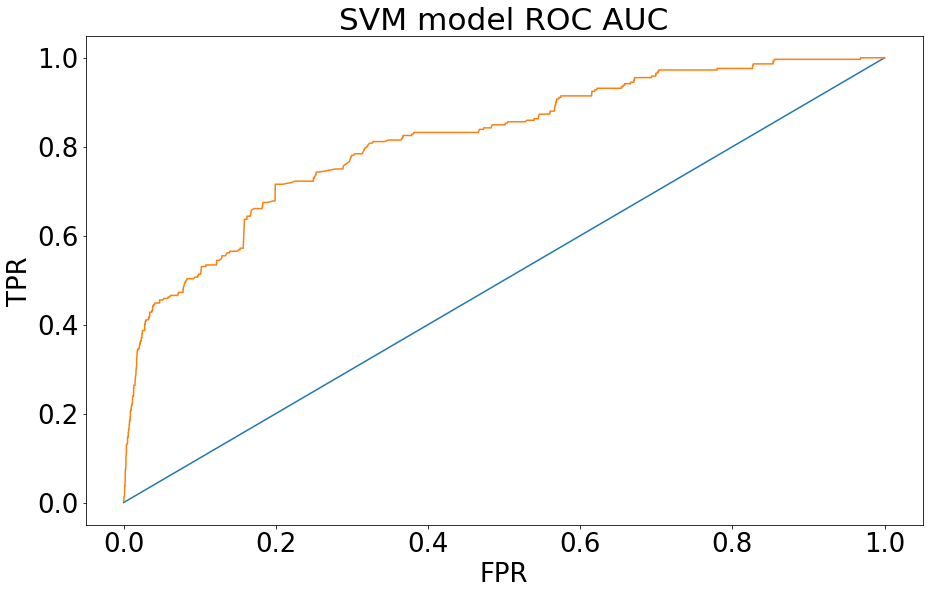

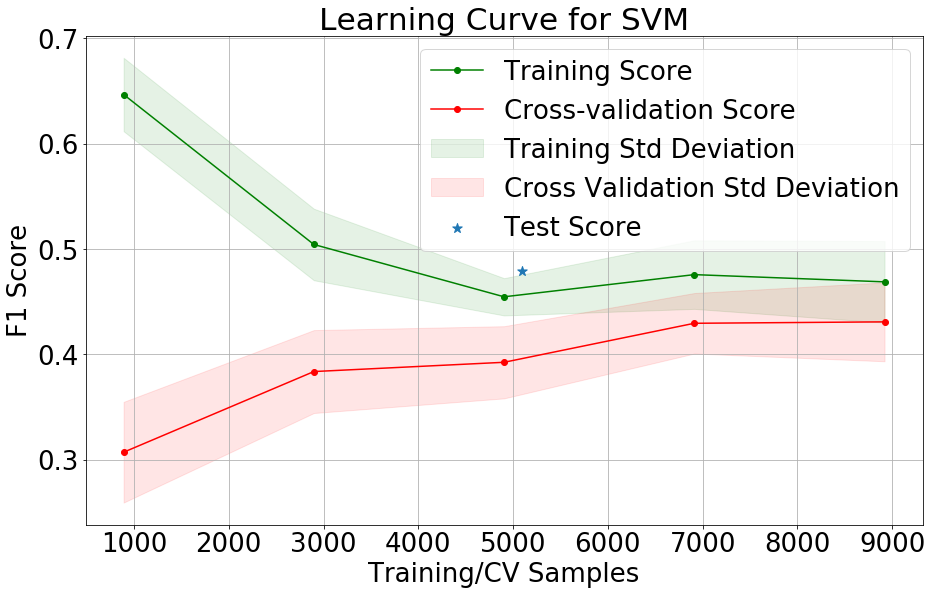

In [87]:
%%time
X_train_svm,y_train_svm,X_test_svm,y_test_svm,kernel,C=svm_model(feature_df,target)
svm_est=exec_svm_svc(X_train_svm,y_train_svm,C=C,kernel=kernel,title='SVM model ROC AUC')
learning_curve_func(svm_est,X_train_svm,y_train_svm,X_test_svm,y_test_svm,title='Learning Curve for SVM')

## Trying XGBoost as SVM is not giving good results

### XGBoost


In [88]:
%%time
xgb_tuned_param=[{'learning_rate':[.1,1,10],'max_depth':[5,6,7,8],'n_estimators':[1000]}]
clf = GridSearchCV(xgb.XGBClassifier(),xgb_tuned_param, cv=5, scoring='f1')
#clf = GridSearchCV(SVC(C=1), tuned_parameters , cv=5, scoring=score)
clf.fit(X_train_svm, y_train_svm)

print("Best parameters set found on development set:")
print()
print(clf.best_estimator_)
print()
print("Grid scores on development set:")
print()
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))

Best parameters set found on development set:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Grid scores on development set:

0.511 (+/-0.015) for {'learning_rate': 0.1, 'max_depth': 5}
0.521 (+/-0.013) for {'learning_rate': 0.1, 'max_depth': 6}
0.514 (+/-0.013) for {'learning_rate': 0.1, 'max_depth': 7}
0.527 (+/-0.014) for {'learning_rate': 0.1, 'max_depth': 8}
0.533 (+/-0.006) for {'learning_rate': 1, 'max_depth': 5}
0.541 (+/-0.005) for {'learning_rate': 1, 'max_depth': 6}
0.529 (+/-0.011) for {'learning_rate': 1, 'max_depth': 7}
0.532 (+/-0.011) for {'learning_rate': 1, 'max_depth': 8}
0.083 (+/-0.034) for {'learning_rate': 10, 'max_depth': 5}
0.

In [89]:
best_xgb=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [90]:
best_xgb.fit(np.array(X_train_svm),np.array( y_train_svm))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [91]:
y_xgb_pred=best_xgb.predict(np.array(X_test_svm))

In [92]:
metrics.f1_score(y_test_svm,y_xgb_pred)

0.55619596541786742

In [99]:
%%time

rcParams['figure.figsize'] = 15,9
rcParams.update({'font.size': 6})
learning_curve_func(best_xgb,np.array(X_train_svm),np.array(y_train_svm),\
                    np.array(X_test_svm),np.array(y_test_svm),title='Learning Curve XG Boost')
rcParams.update({'font.size': 6})

KeyboardInterrupt: 

In [93]:
print(metrics.classification_report(y_test_svm,y_xgb_pred))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97      4712
          1       0.62      0.50      0.56       385

avg / total       0.93      0.94      0.94      5097



In [95]:
metrics.confusion_matrix(y_test_svm,y_xgb_pred)

array([[4596,  116],
       [ 192,  193]])

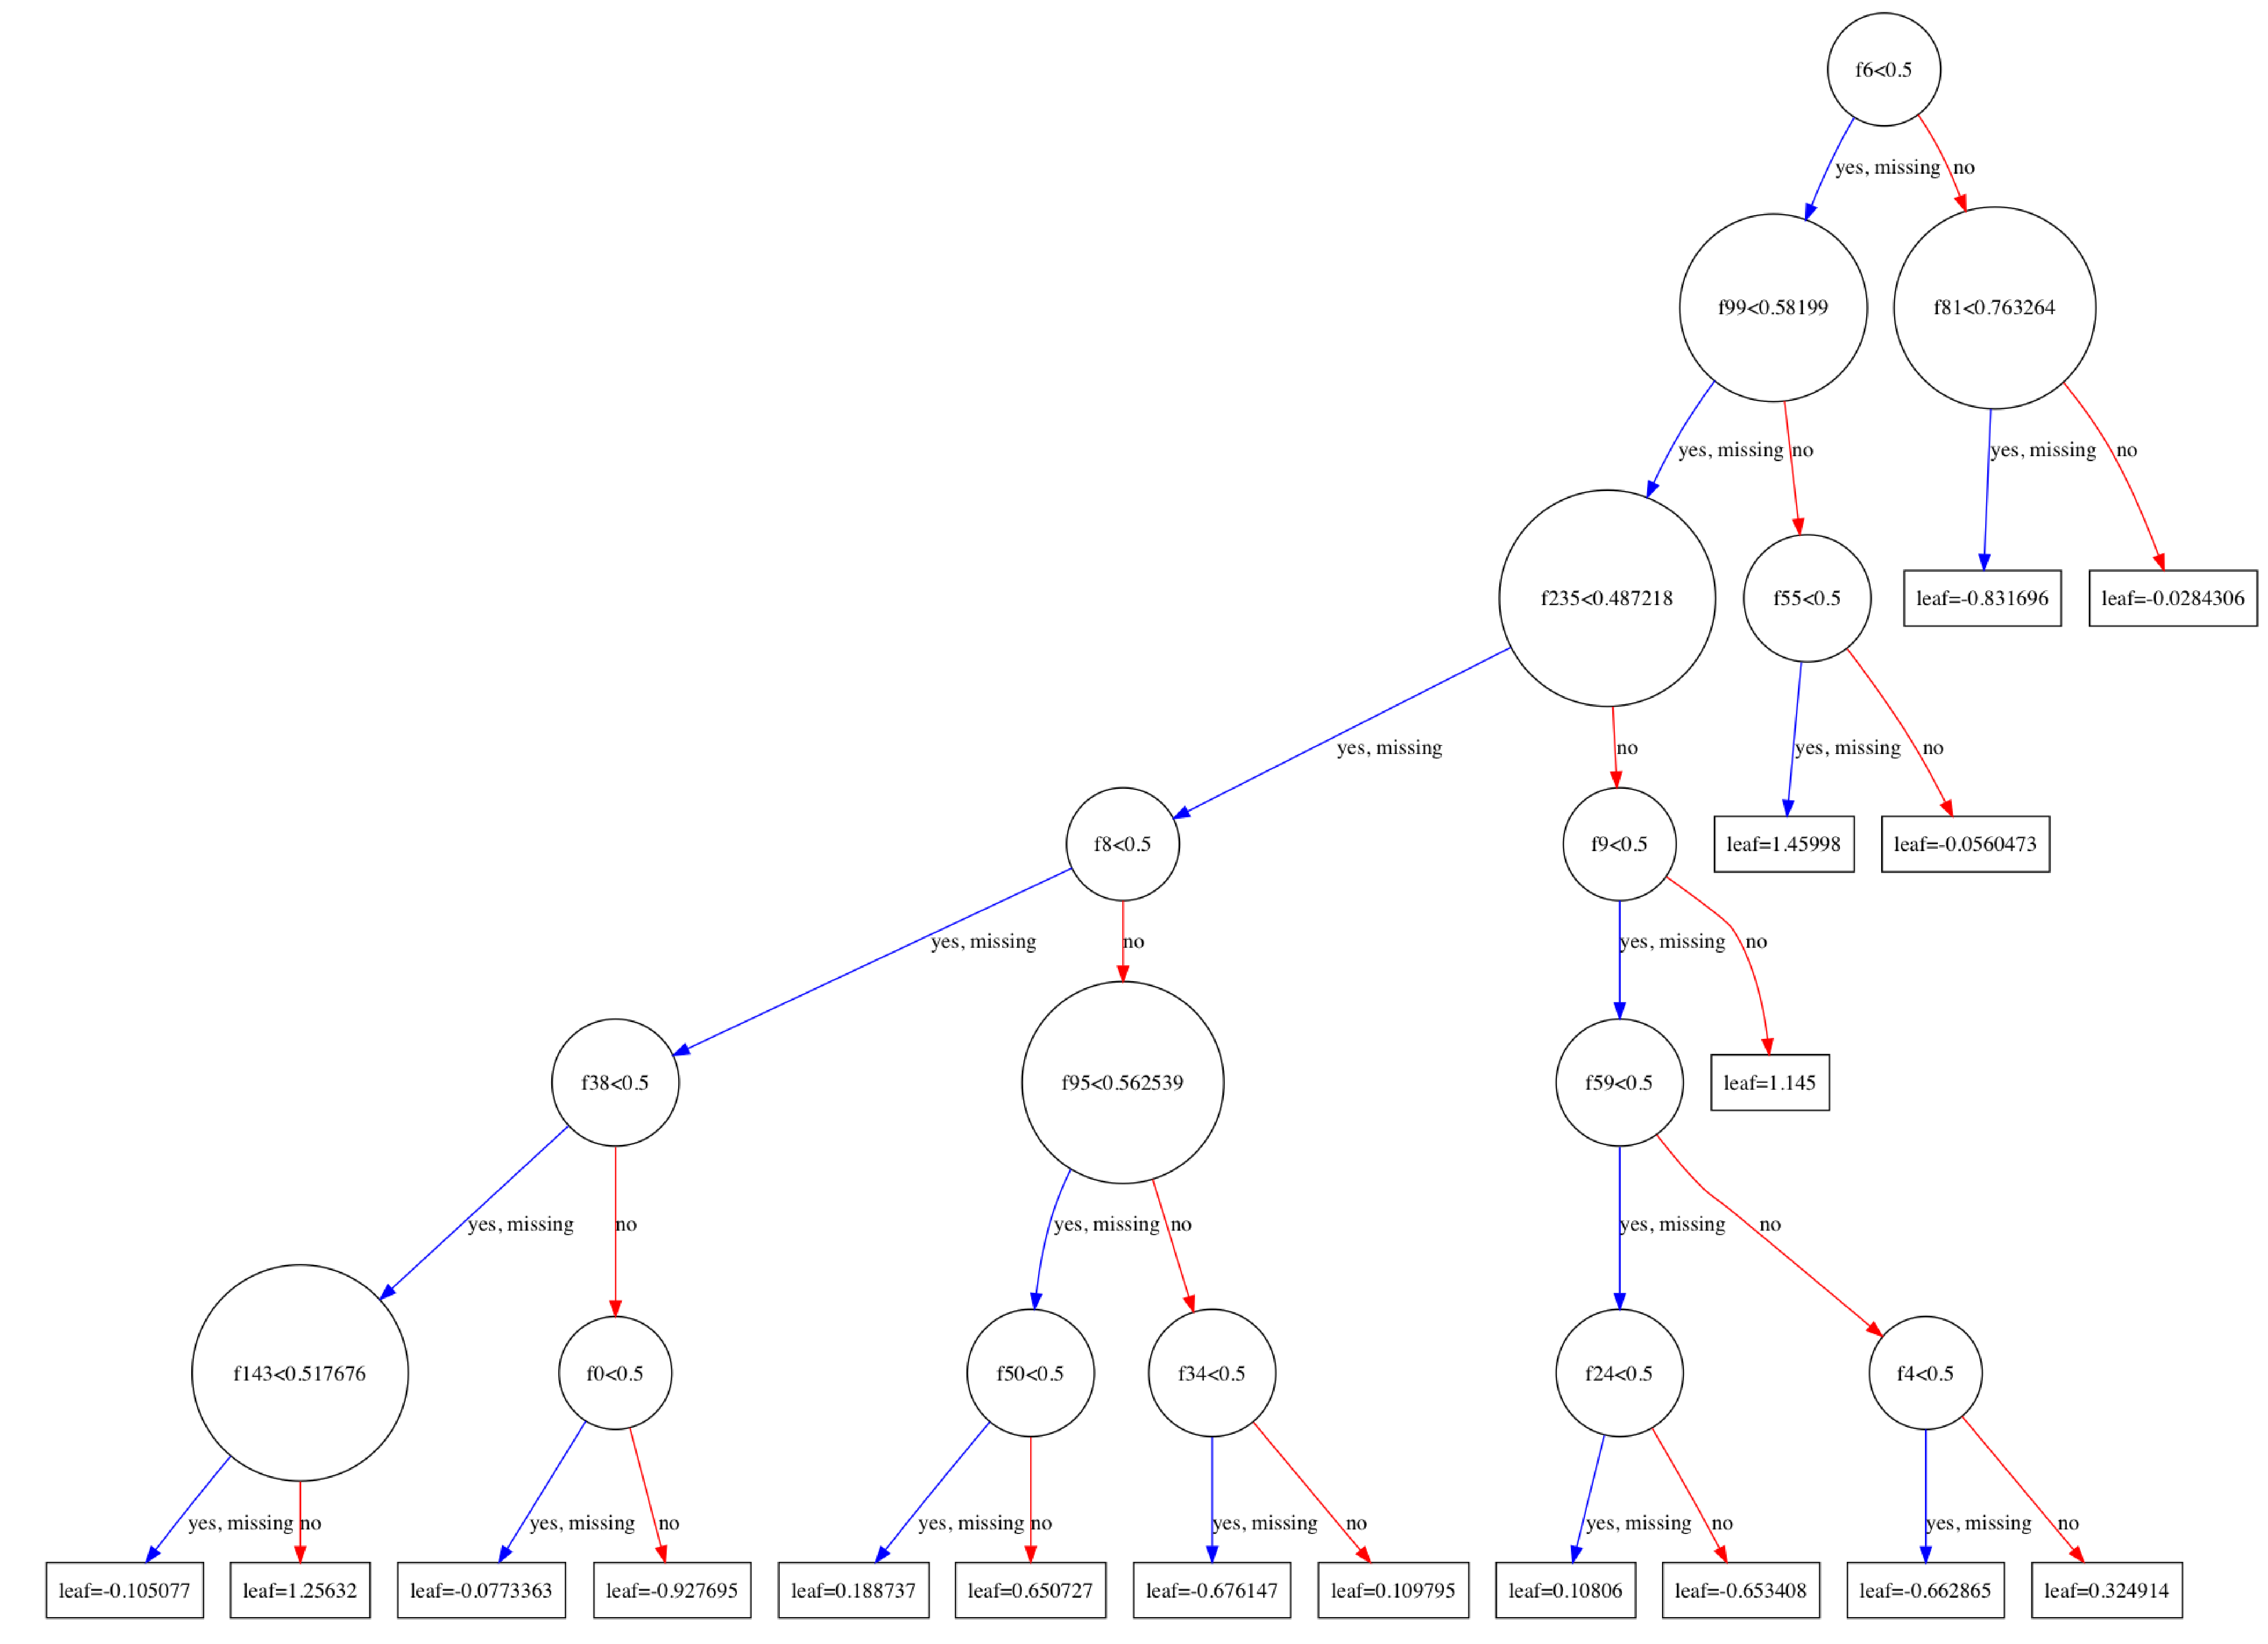

In [96]:
%matplotlib inline

##set up the parameters
rcParams['figure.figsize'] = 80,60
rcParams.update({'font.size': 26})
plot_tree(best_xgb, num_trees=5)


In [ ]:
for i,x in enumerate(list(X_test_svm.columns)):
    print(i,x)

In [56]:
coef_dict={}
for x,coef in list(zip(X_test_svm.columns,best_xgb.feature_importances_)):
    coef_dict[x]=coef

In [98]:
XGB_feature_importances = sorted(zip(X_test_svm.columns,abs(best_xgb.feature_importances_)), key=lambda x: -x[1])[:35]
XGB_feature_importances

[('behind', 0.038267728),
 ('people', 0.035930768),
 ('rank_order_chronological', 0.034835316),
 ('edition', 0.030526547),
 ('type_video', 0.030088367),
 ('starbucks', 0.028043525),
 ('company_name_Starbucks', 0.027240196),
 ('company_name_Coca Cola', 0.026509896),
 ('type_photo', 0.025852626),
 ('type_link', 0.025414445),
 ('Hour_16', 0.025268385),
 ('Hour_19', 0.022712335),
 ('uploads', 0.022274155),
 ('company_name_Microsoft', 0.021397794),
 ('Hour_17', 0.021251734),
 ('Hour_18', 0.020886585),
 ('brand_name_SimplyOrange', 0.019791134),
 ('facebook', 0.018768715),
 ('living', 0.018549623),
 ('Hour_13', 0.018330533),
 ('Hour_15', 0.017381143),
 ('Hour_14', 0.016942963),
 ('brand_name_GoldenPeak', 0.016723873),
 ('Hour_21', 0.016504783),
 ('Hour_20', 0.016431753),
 ('brand_name_Coca Cola Life', 0.015555393),
 ('company_name_Nike', 0.013437523),
 ('brand_name_All', 0.012561163),
 ('brand_name_SmartWater', 0.012342073),
 ('type_status', 0.012049953),
 ('coca', 0.011830863),
 ('rank_order

In [101]:
import pylab as pl
from sklearn.decomposition import PCA

In [102]:
%%time
pca = PCA(n_components=2).fit(X_test_svm)
pca_2d = pca.transform(X_test_svm)

CPU times: user 164 ms, sys: 94.2 ms, total: 258 ms
Wall time: 331 ms


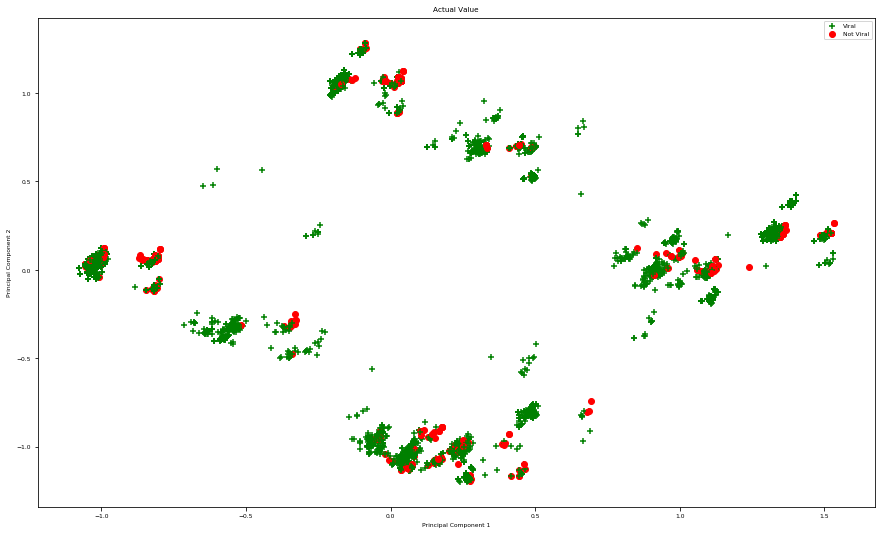

CPU times: user 22.6 s, sys: 135 ms, total: 22.8 s
Wall time: 23 s


In [107]:
%%time
plt.figure(figsize=(15,9))
ax = plt.subplot(111)
for i in range(0, pca_2d.shape[0]):
    if np.array(y_test_svm)[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    marker='+')
    elif np.array(y_test_svm)[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    marker='o')

pl.legend([c1, c2], ['Viral', 'Not Viral'])
ax.legend(bbox_to_anchor=(1.1, 1.05))
pl.title('Actual Value')
rcParams.update({'font.size': 12})
pl.xlabel('Principal Component 1')
pl.ylabel('Principal Component 2')
pl.show()

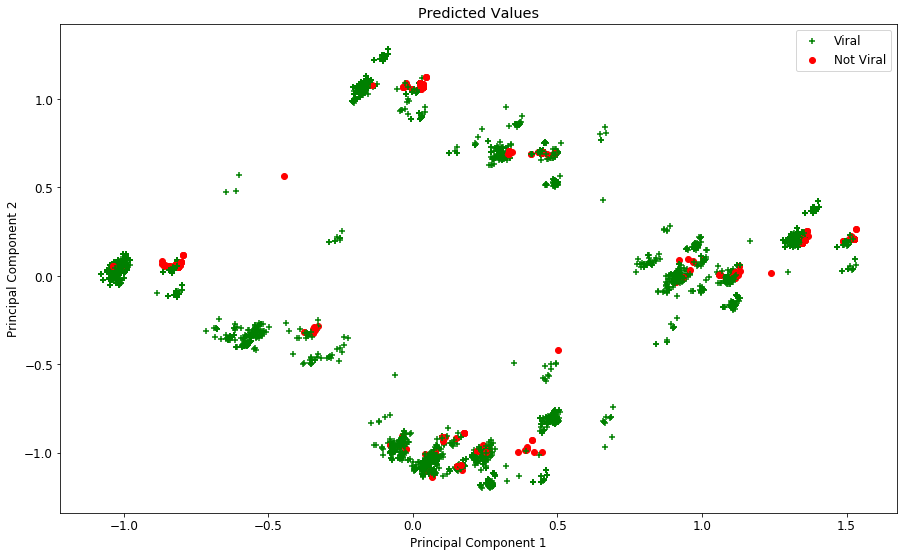

CPU times: user 23.9 s, sys: 93.1 ms, total: 24 s
Wall time: 24 s


In [108]:
%%time
plt.figure(figsize=(15,9))
ax = plt.subplot(111)
for i in range(0, pca_2d.shape[0]):
    if np.array(y_xgb_pred)[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    marker='+')
    elif np.array(y_xgb_pred)[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    marker='o')

pl.legend([c1, c2], ['Viral', 'Not Viral'])
ax.legend(bbox_to_anchor=(1.1, 1.05))
pl.title('Predicted Values')
pl.xlabel('Principal Component 1')
pl.ylabel('Principal Component 2')
pl.show()

In [109]:
metrics.fbeta_score(y_test_svm,y_xgb_pred,beta=.2)

0.61874229346485821

In [112]:
target.value_counts()

0    15683
1     1307
Name: Viral, dtype: int64